<a href="https://colab.research.google.com/github/69421/mbacke2801/blob/main/W5RCefrHGhVRlq_EEpT_Ug_Lab_16_Scatter_Plot_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [15]:
#!pip install pandas
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [16]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)


In [27]:
print(df["Age"])

0        Under 18 years old
1           35-44 years old
2           45-54 years old
3           18-24 years old
4           18-24 years old
                ...        
65432       18-24 years old
65433       25-34 years old
65434       25-34 years old
65435       18-24 years old
65436       18-24 years old
Name: Age, Length: 65437, dtype: object



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




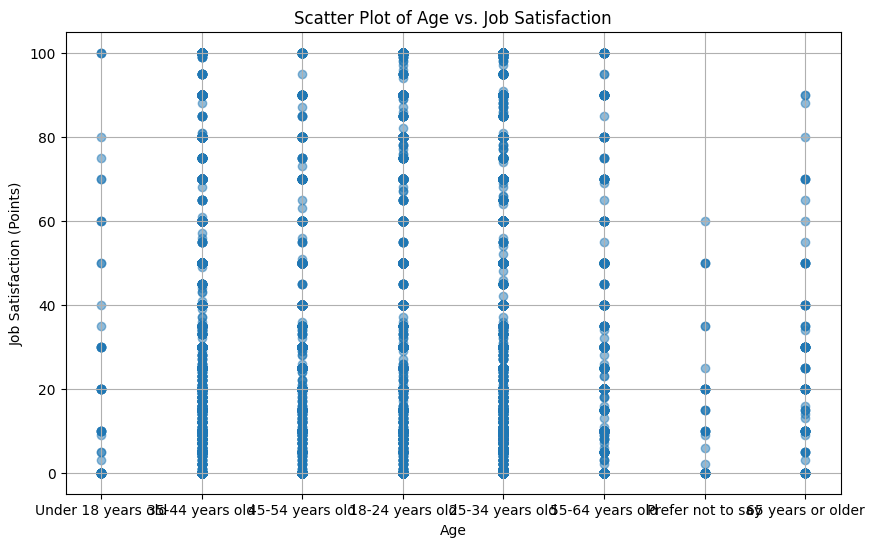

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


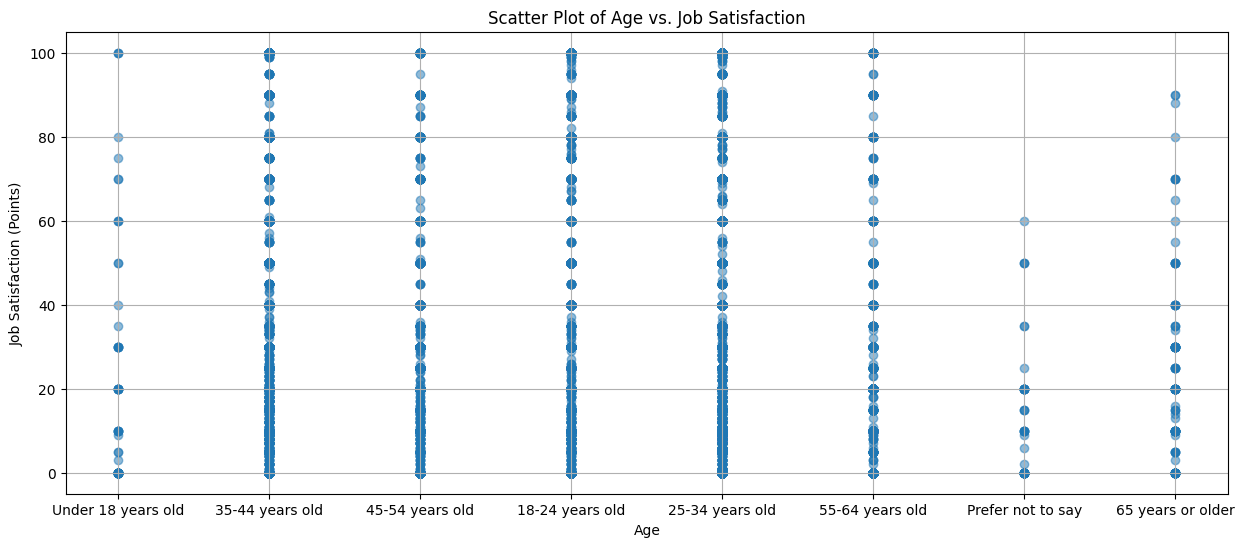

In [20]:
## Write your code here
plt.figure(figsize=(15, 6))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


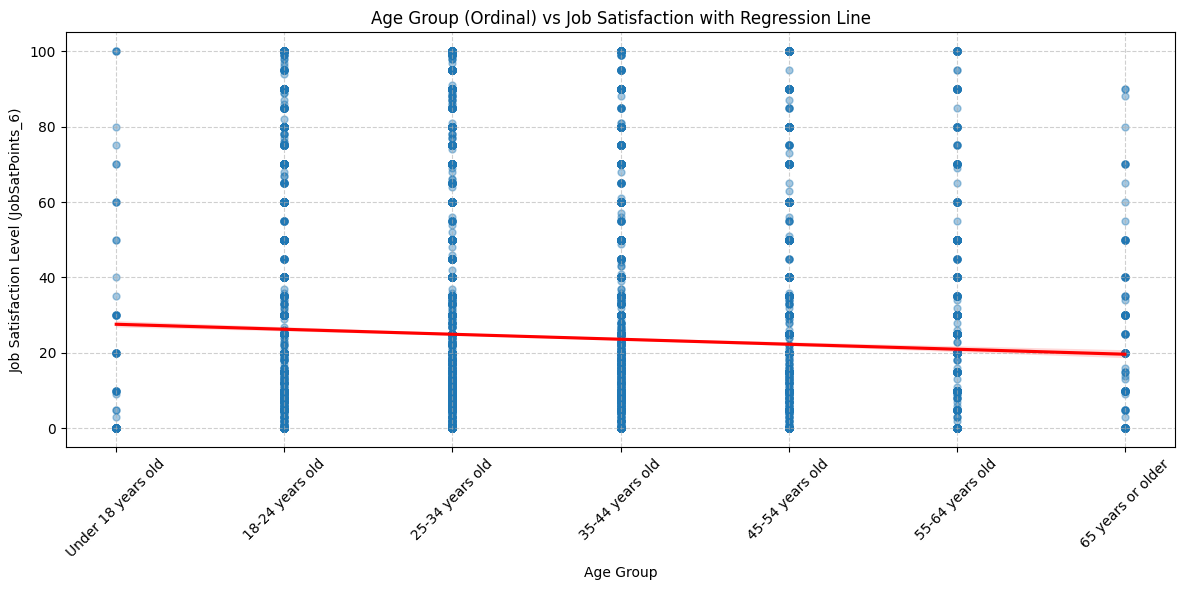

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyer les données
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6']).copy()

# Filtrer uniquement les âges valides
valid_ages = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df_clean = df_clean[df_clean['Age'].isin(valid_ages)].copy()

# Attribuer un index numérique par groupe d’âge (pas besoin de mapping manuel)
df_clean['AgeOrdinal'] = df_clean['Age'].apply(lambda x: valid_ages.index(x))

# Tracer le scatter plot avec une droite de régression
plt.figure(figsize=(12, 6))
sns.regplot(
    x='AgeOrdinal',
    y='JobSatPoints_6',
    data=df_clean,
    scatter_kws={'alpha': 0.4, 's': 25},
    line_kws={'color': 'red'}
)

# Remplacer les ticks de l’axe x par les libellés d’âges
plt.xticks(ticks=range(len(valid_ages)), labels=valid_ages, rotation=45)

plt.title('Age Group (Ordinal) vs Job Satisfaction with Regression Line')
plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction Level (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


<ipython-input-34-108d7c252d8c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodeProNumeric'] = df_clean['YearsCodePro'].apply(convert_years_code)


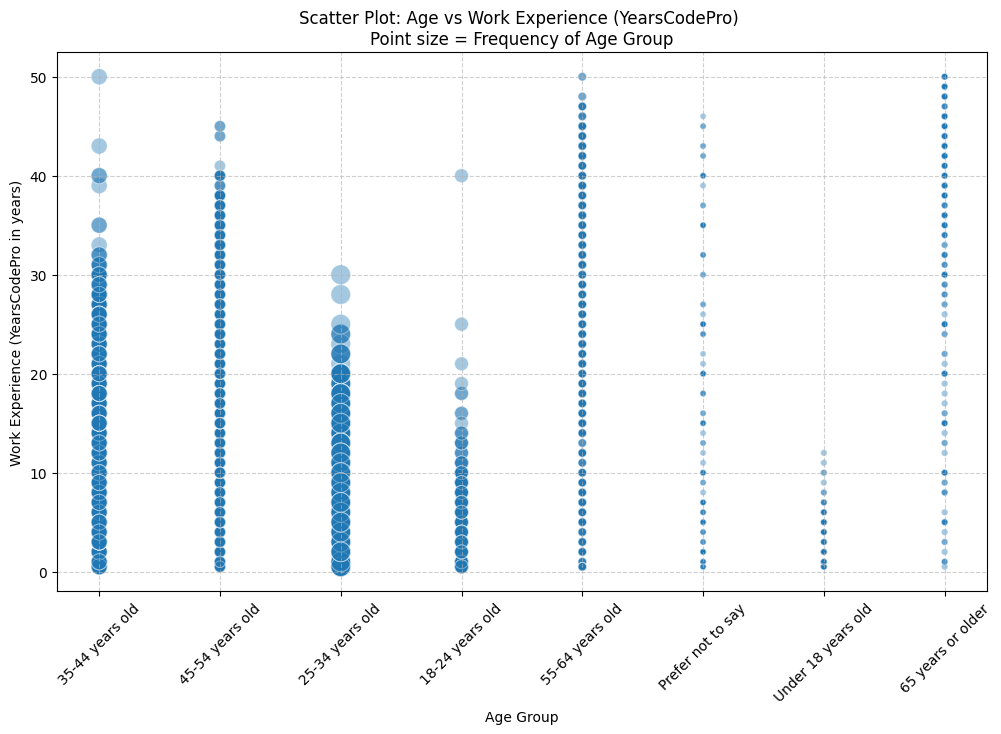

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Nettoyer les données de base
df_clean = df.dropna(subset=['Age', 'YearsCodePro'])

# Convertir YearsCodePro en numérique (avec gestion des cas spéciaux)
def convert_years_code(x):
    try:
        return float(x)
    except:
        if isinstance(x, str):
            if 'Less than' in x:
                return 0.5
            elif 'More than' in x:
                return 40  # Arbitrary max
        return None

df_clean['YearsCodeProNumeric'] = df_clean['YearsCodePro'].apply(convert_years_code)
df_clean = df_clean.dropna(subset=['YearsCodeProNumeric'])

# Calculer la fréquence de chaque groupe d'âge pour donner la taille des points
age_counts = df_clean['Age'].value_counts()

# Ajouter une colonne 'Count' pour chaque ligne selon l'âge
df_clean['AgeCount'] = df_clean['Age'].map(age_counts)

# Tracer scatter plot avec taille selon fréquence de la tranche d'âge
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Age',
    y='YearsCodeProNumeric',
    data=df_clean,
    size='AgeCount',  # taille des points proportionnelle à la fréquence de la tranche d'âge
    sizes=(20, 200),   # plage de tailles
    alpha=0.4,
    legend=False
)
plt.xticks(rotation=45)
plt.title("Scatter Plot: Age vs Work Experience (YearsCodePro) \nPoint size = Frequency of Age Group")
plt.xlabel("Age Group")
plt.ylabel("Work Experience (YearsCodePro in years)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


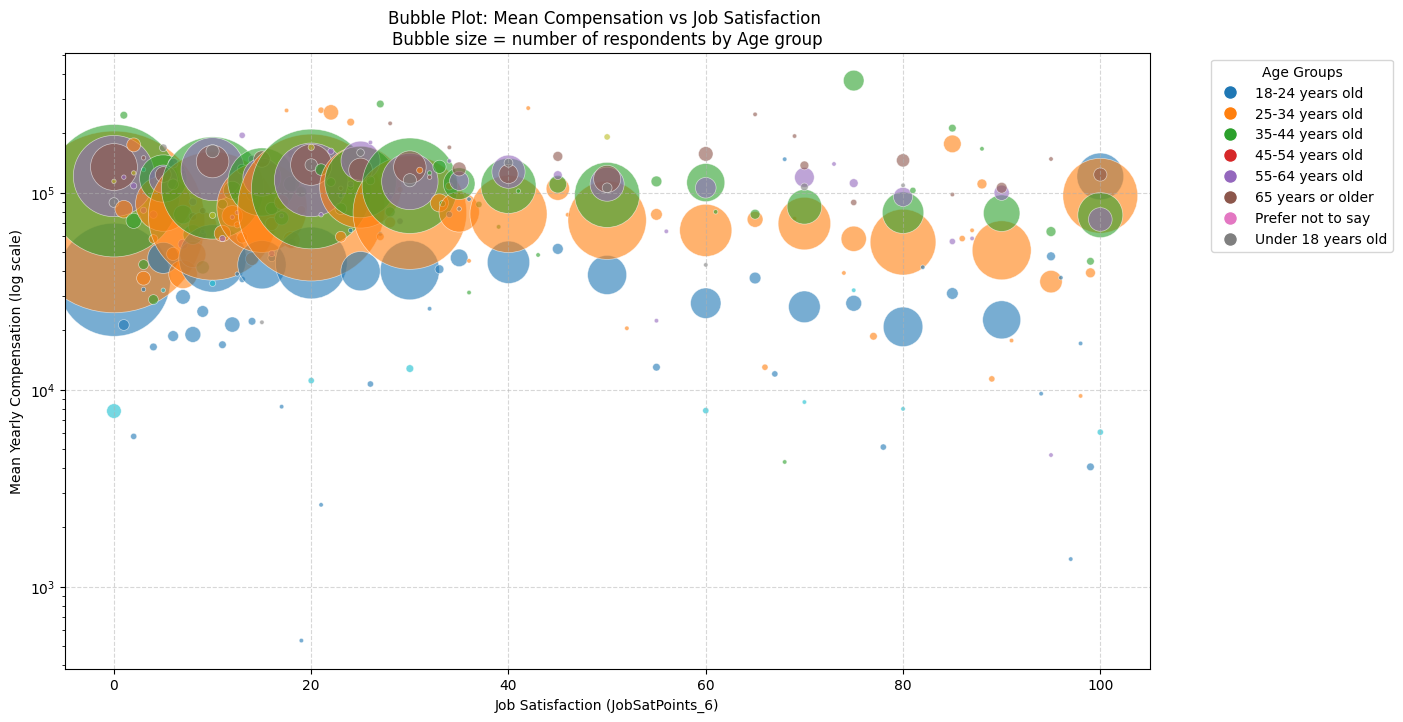

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# On part du DataFrame df avec les colonnes : 'ConvertedCompYearly', 'JobSatPoints_6', 'Age'

# Nettoyage (supprimer les lignes avec valeurs manquantes sur ces colonnes)
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Grouper par JobSatPoints_6 et Age, en comptant le nombre d'éléments et la moyenne de compensation
grouped = df_clean.groupby(['JobSatPoints_6', 'Age']).agg(
    count=('ConvertedCompYearly', 'size'),
    mean_compensation=('ConvertedCompYearly', 'mean')
).reset_index()

# Tracer le bubble plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=grouped['JobSatPoints_6'],
    y=grouped['mean_compensation'],
    s=grouped['count'] * 10,  # taille des bulles proportionnelle au count, ajuste le facteur si besoin
    alpha=0.6,
    c=pd.Categorical(grouped['Age']).codes,  # couleur selon l'âge (catégorie)
    cmap='tab10',
    edgecolors='w',
    linewidth=0.5
)

plt.yscale('log')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Mean Yearly Compensation (log scale)')
plt.title('Bubble Plot: Mean Compensation vs Job Satisfaction \nBubble size = number of respondents by Age group')
plt.grid(True, linestyle='--', alpha=0.5)

# Légende couleur Age
from matplotlib.lines import Line2D
age_categories = grouped['Age'].unique()
colors = [plt.cm.tab10(i) for i in range(len(age_categories))]
legend_elements = [Line2D([0], [0], marker='o', color='w', label=age,
                          markerfacecolor=colors[i], markersize=10) for i, age in enumerate(age_categories)]
plt.legend(handles=legend_elements, title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


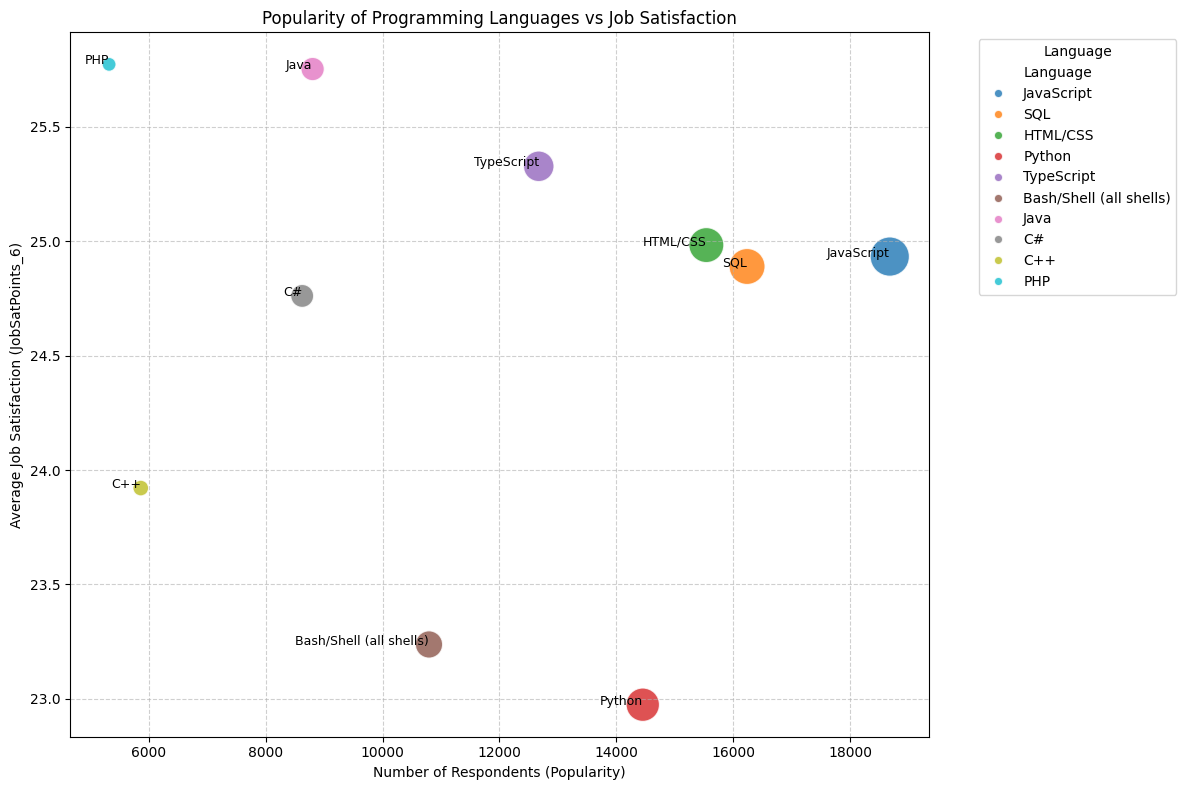

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose que ton DataFrame s'appelle df avec les colonnes 'LanguageHaveWorkedWith' et 'JobSatPoints_6'
# On commence par nettoyer et transformer les données

df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# On "explose" les langages séparés par point-virgule
df_exploded = df_clean.assign(
    Language=df_clean['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Calculer la satisfaction moyenne et le nombre d'utilisateurs par langage
lang_stats = df_exploded.groupby('Language').agg(
    AvgSatisfaction=('JobSatPoints_6', 'mean'),
    Count=('Language', 'count')
).reset_index()

# Garder les 10 langages les plus populaires
top_languages = lang_stats.sort_values(by='Count', ascending=False).head(10)

# Plot avec Seaborn
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=top_languages,
    x='Count',
    y='AvgSatisfaction',
    hue='Language',
    size='Count',
    sizes=(100, 800),
    legend='brief',
    palette='tab10',
    alpha=0.8
)

# Ajouter les étiquettes sur les points
for _, row in top_languages.iterrows():
    plt.text(row['Count'], row['AvgSatisfaction'], row['Language'], fontsize=9, ha='right')

plt.title('Popularity of Programming Languages vs Job Satisfaction')
plt.xlabel('Number of Respondents (Popularity)')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.grid(True, linestyle='--', alpha=0.6)

# Améliorer la légende
handles, labels = scatter.get_legend_handles_labels()
# Garder uniquement la légende des couleurs (hue), donc sauter les tailles
n_langs = top_languages.shape[0]
plt.legend(handles[:n_langs + 1], labels[:n_langs + 1], title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


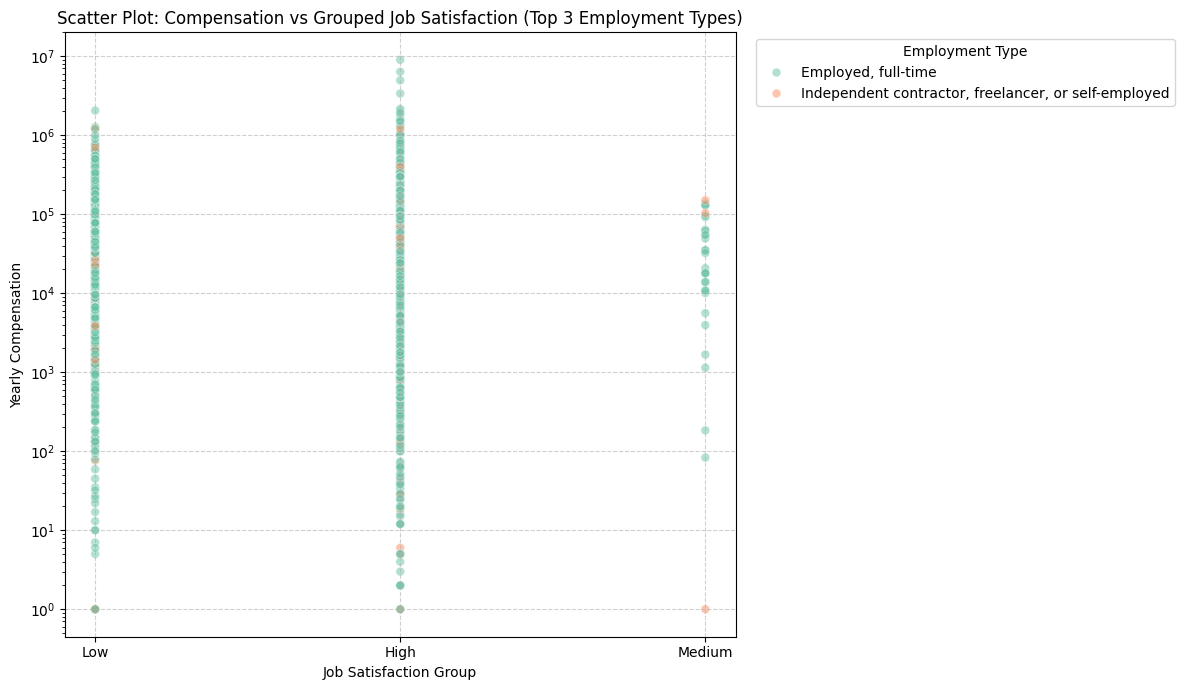

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrer les 3 types d’emploi les plus fréquents
top_3_employment = df['Employment'].value_counts().head(3).index.tolist()
df_top3 = df[df['Employment'].isin(top_3_employment)].copy()

# 2. Nettoyer les données nécessaires
df_top3 = df_top3.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# 3. Regrouper les niveaux de satisfaction en catégories
def group_satisfaction(val):
    try:
        val = float(val)
        if val <= 2:
            return 'Low'
        elif val <= 4:
            return 'Medium'
        else:
            return 'High'
    except:
        return None

df_top3['SatisfactionGroup'] = df_top3['JobSatPoints_6'].apply(group_satisfaction)
df_top3 = df_top3.dropna(subset=['SatisfactionGroup'])

# 4. Créer le scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_top3,
    x='SatisfactionGroup',
    y='ConvertedCompYearly',
    hue='Employment',
    alpha=0.5,
    s=40,
    palette='Set2'
)

plt.title('Scatter Plot: Compensation vs Grouped Job Satisfaction (Top 3 Employment Types)')
plt.xlabel('Job Satisfaction Group')
plt.ylabel('Yearly Compensation')
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Employment Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


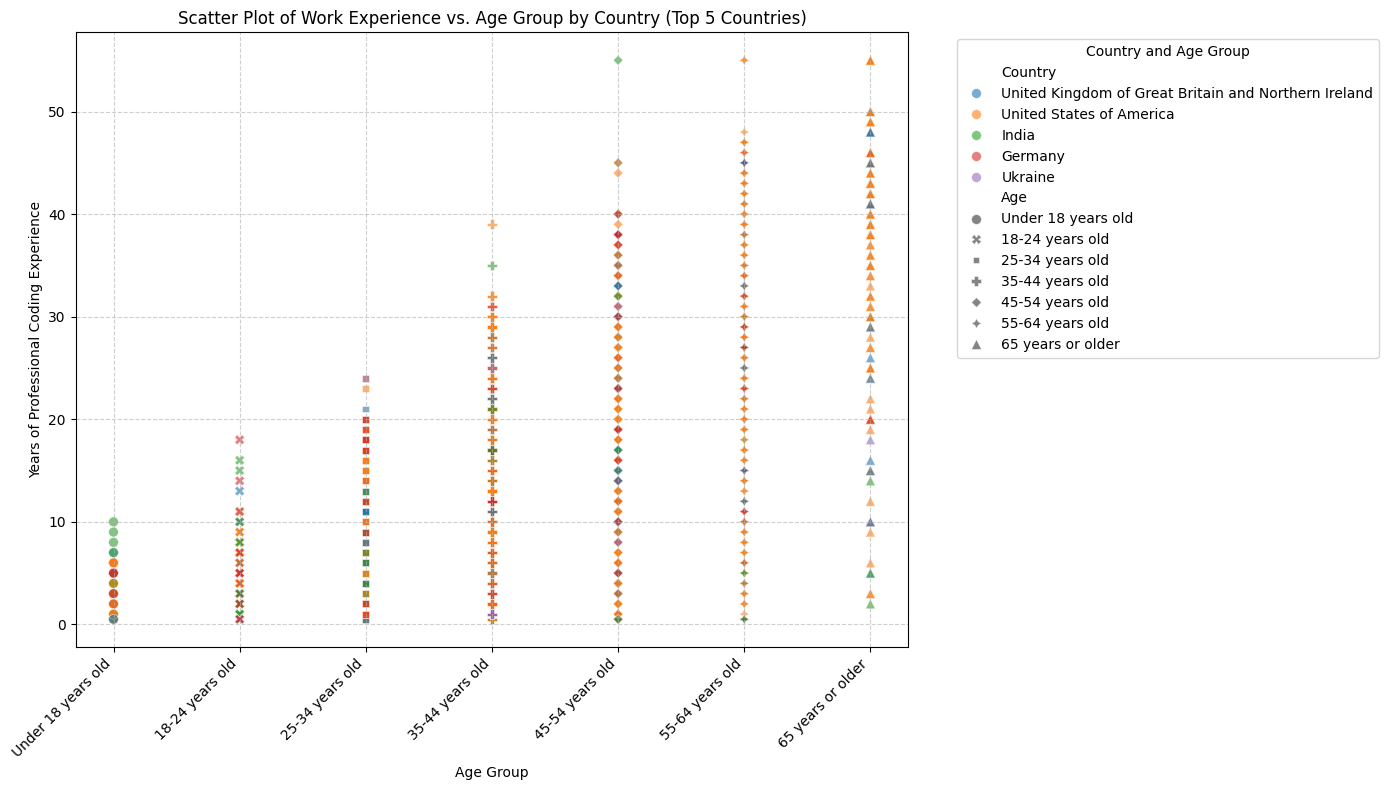

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (if not already loaded)
# file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
# df = pd.read_csv(file_path)

# Data Cleaning and Preparation
df_scatter = df.copy()

# Convert YearsCodePro to numerical values
def convert_years_code(x):
    if isinstance(x, str):
        if 'Less than' in x:
            return 0.5
        elif 'More than' in x:
            return 55  # Assign a high value for 'More than 50 years'
        else:
            try:
                return float(x)
            except ValueError:
                return None
    return None

df_scatter['YearsCodeProNumeric'] = df_scatter['YearsCodePro'].apply(convert_years_code)

# Define the order of age groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Filter data to include only the top N countries for better visualization
top_n_countries = 5  # You can adjust this number
top_countries = df_scatter['Country'].value_counts().head(top_n_countries).index.tolist()
df_filtered = df_scatter[df_scatter['Country'].isin(top_countries)].copy()

# Drop rows with missing values in the relevant columns after filtering
df_filtered.dropna(subset=['YearsCodeProNumeric', 'Age', 'Country'], inplace=True)

# Ensure 'Age' is a categorical type with the defined order
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Create the scatter plot using seaborn
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_filtered,
    x='Age',
    y='YearsCodeProNumeric',
    hue='Country',         # Color points by Country
    style='Age',           # Use different markers for Age
    alpha=0.6,             # Adjust transparency
    s=50,                  # Adjust marker size
)

plt.title(f'Scatter Plot of Work Experience vs. Age Group by Country (Top {top_n_countries} Countries)')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust legend placement
plt.legend(title='Country and Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
